# HiDPy - Stage 3 : Comparison between average statistics of Subpopulations from different biological conditions

## About 

This is the third stage of the HidPy workflow. It loads the statitics from stage 2 for different conditions.

## 3.1 Import the relevant packages

_Note: Please do NOT edit this panel._ 

In [1]:
# Imports 
import pickle
import os
import pathlib 
import sys 
from scipy import stats
import pandas

# Path hidpy
sys.path.append('%s/../' % os.getcwd())

import warnings
warnings.filterwarnings('ignore') # Ignore all the warnings 

from core import plotting

## 3.2 Input panel 

The user must update these parameters to match the parameters in Stage 2 and input the folder path per condition to be analyzed.

In [2]:
Pickles_Cond = {}

Pickles_Cond[0] = '%s/../data/U2OS_SiR_DNA_NoSerum/hidpy.output/Pickles/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()
Pickles_Cond[1] = '%s/../data/U2OS_SiR_DNA_Serum/hidpy.output/Pickles/gmm_constrained/pickle/Statistics.pickle' % os.getcwd()

file_path_Excel= '%s/../data/Results_NoSerum_Serum.xlsx' % os.getcwd()

# Names of conditions
ConditionsSTR = ['- Serum','+ Serum']

# Parameters that were deconvolved 
Paramdecon_keylist = ['D','A','V']

## 3.3 Reading statistical results per condition 

_Note: Please do NOT edit this panel._ 

In [3]:
data_dicts = {}
file_keylists = {}

# Reading dictionaries and files keylists

for condNum in range(len(Pickles_Cond)):
    data_dict = list()

    with open(Pickles_Cond[condNum],'rb') as f:
        data_dict = pickle.load(f)

    data_dicts[condNum] = data_dict
    file_keylists[condNum] =list(data_dict.keys())

## 3.4 Plotting comparison plots per biophysical parameter

_Note: Please do NOT edit this panel._ 

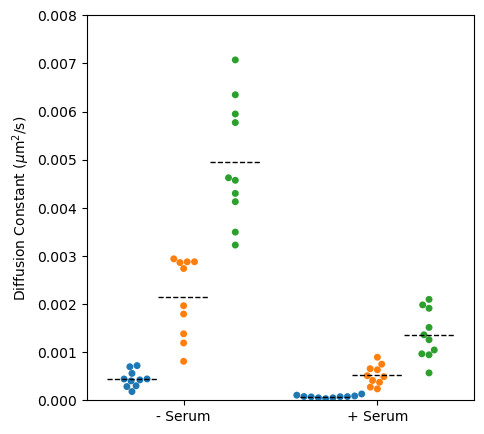

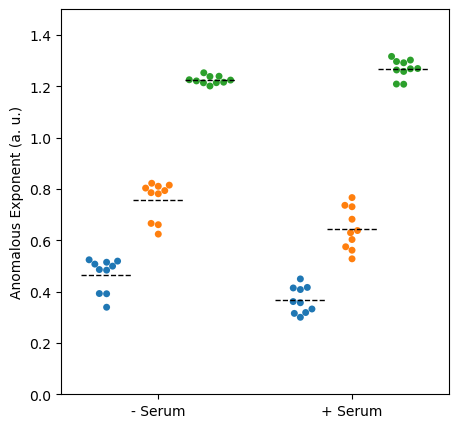

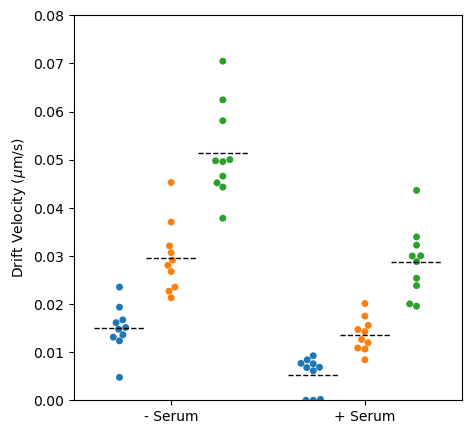

In [4]:

df_All=plotting.plot_swarmplotComparison(file_keylists,Paramdecon_keylist,data_dicts,ConditionsSTR)

## 3.5 Save results in Excel file

_Note: Please do NOT edit this panel._ 

In [5]:
writer=pandas.ExcelWriter(file_path_Excel,engine='xlsxwriter')

counter=0
for df0 in df_All:
    df0.to_excel(writer,sheet_name=Paramdecon_keylist[counter],index=False)
    counter=counter+1

writer.save()

print('DataFrame saved as Excel')

DataFrame saved as Excel


## 3.6 Statistics. t-test



In [6]:
# Input parameters

Parameter2compare= 'D'               # Biophysical parameter to be compared
PopStr='Pop1'                       # Population to be compared

In [7]:
df=df_All[Paramdecon_keylist.index(Parameter2compare)]

# Filter the DataFrame based on the conditions

filtered_NoSerum = df[(df['Populations'] == PopStr) & (df['Conditions'] == 0)]
filtered_Serum = df[(df['Populations'] == PopStr) & (df['Conditions'] == 1)]


# Extract the values for the comparison
NoSerum = filtered_NoSerum['Values']
Serum = filtered_Serum['Values']


# Perform the t-test
t_statistic, p_value = stats.ttest_ind(NoSerum,Serum)


# Print the results
print("T-Statistic: ", t_statistic)
print("P-value: ", p_value)

T-Statistic:  6.65275358584501
P-value:  3.044663831429596e-06
